# Anscombe's Quartet Dataset
----------------

## Here follows and investigation into the origins and applications of the dataset

The notebook will first provide a look into the origins of the dataset:
* Who created it
* When it was created
* Reasons behind the origin of the dataset

We will then have a look at some visual representations, in order to demonstrate some interesting characteristics of the dataset

Following on, we will perform some statistical analysis and calculate a variety of descriptive statistics for the dataset

Finally, using the above visuals and statistical calculations, we will discuss some of the more unusual aspects of the dataset

## 1. Background of Anscombe's Quartet Dataset
Frank Anscombe [1], English statistician, created the dataset in 1973 [2]. The dataset consists of four (4) distinct groups of bivariate data, each group containing 11 points with an x and y variable component.
Anscombe felt that the statistical analysis of data through formulaic methods alone could be misleading and that the often discounted graphical method, should be used in order to (i) validate assumptions made about the data and (ii) provide context regarding the behaviour of the data [3].

## 2. Plotting the data
First we load the dataset, in order to view and operate on the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

anscFrame = sns.load_dataset("anscombe")
anscFrame

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


From the above output, it is clear that the datasate consists of 44 datapoints, split evenly among 4 distinct datasets. In each data there are 11 (x, y) datapoints. We can also verify this using the below:

In [2]:
print(anscFrame.groupby('dataset').size())

dataset
I      11
II     11
III    11
IV     11
dtype: int64


For each of the datasets I - IV, there are 11 datapoints in each case.

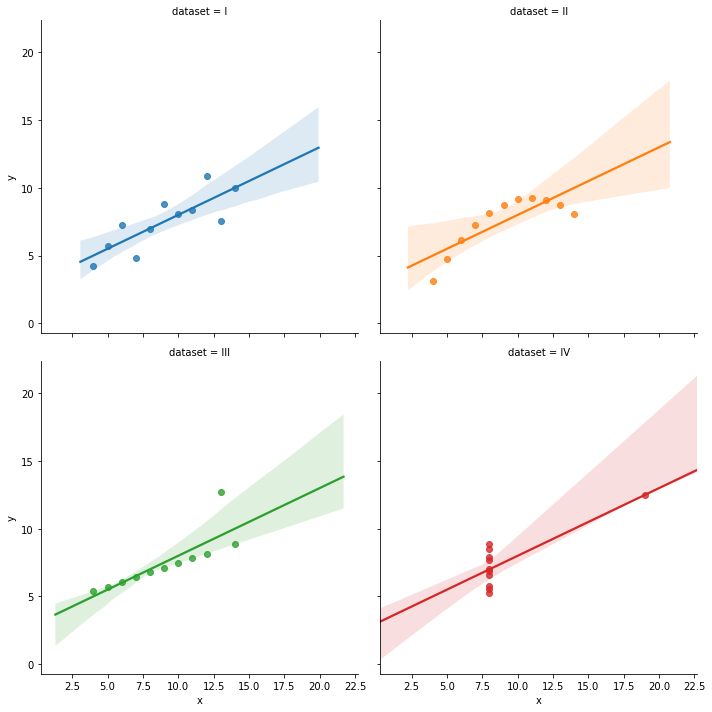

In [3]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscFrame,
           col_wrap=2);

From the above visualisations, it is clear that the datasets are very different. For example, datasets II and III look as though they are of second and first order, respectively, with dataset IV showing a constant value for X, these with the exception of one outlier in two of the datasets.

Even without the line of best fit, as plotted by seaborn, there is a very obvious, and strong, positive correlation between the x and y variable (i.e. close to a value of +1). There is, however no observable connection between any of the datasets

## 3. Summary Statistics
The summary statistics of a dataset are mathematical representations/calculations, which give us quantitative information about the data, for example what is the mean average of the set, how is the data spread around that mean (standard deviation), minimum and maximum values and the quartile values. If the mean value splits the ordered dataset in half, then the quartiles are effectively the mean values of each half. The Lower Quartile is the mean value of the lower half of the dataset, while the Upper Quartile is the mean value of the upper half.
A more accurate way of thinking about the quartiles is that 25% of the data values will be smaller than the lower quartile value, 50% of the data values will be smaller than the middle quartile (mean) value and 75% of data values will be smaller than the upper quartile value. There are multiple ways of calculating the quartiles, which is some cases can lead to slightly different values, which may account for differences between the calculated mean and 50% values here.

In [4]:
anscFrame.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [5]:
anscGroup = anscFrame.groupby('dataset')
anscGroup.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In addition to the above basic summary statistics, it is known that each dataset in the Quartet has an almost exact matching correlation between the two variables X and Y. This was alluded to after plotting the datasets and observing their behaviour. We observed that, with the exception of dataset IV (and even then the outlier datapoint makes it possible to assume) it is clear that there is a strong positive correlation between X and Y.

However, the plots only give us a flavour of this. We can in fact calculate the exact correlation coefficient in each case. Correlation measures the strength of any relationship between variables. The correlation coefficient it the numerical representation of that relationship. It is measured on a scale of -1 to +1, where:
- -1 is an exact negative relationship
- 0 is no relationship whatsoever
- +1 is an exact positive relationship

The closer to zero the coefficient, the weaker the relationship and the closer to +/- 1, the stronger the relationship.

In [6]:
anscGroup = anscFrame.groupby('dataset').corr()
anscGroup

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

If we take the figures to 3 decimal places, we can see that in each dataset, the correlation coefficient is 0.816 ... an almost exact match!

### Simple Linear Regression (Line of Best Fit)
Linear regression is a process of attempting to find a representative linear equation that will map the datapoints in a set, as accurately as possible. Graphically, this offers us a shape (line) that most accurately represents the overall shape of our data. In the plots earlier in this notebook, you will see a line superimposed on the data points. For each dataset, this line looks like it could be quite similar.
Again, we have a mathematical method for modelling this "line of best fit", which will tell us how similar these lines are in each case.

In [7]:
# linear regression dataset I
lbf_1 = anscFrame[anscFrame['dataset'] == 'I']
np.polyfit(lbf_1['x'], lbf_1['y'], 1)

array([ 0.50009091,  3.00009091])

In [8]:
# linear regression dataset II
lbf_1 = anscFrame[anscFrame['dataset'] == 'II']
np.polyfit(lbf_1['x'], lbf_1['y'], 1)

array([ 0.5       ,  3.00090909])

In [9]:
# linear regression dataset III
lbf_1 = anscFrame[anscFrame['dataset'] == 'III']
np.polyfit(lbf_1['x'], lbf_1['y'], 1)

array([ 0.49972727,  3.00245455])

In [10]:
# linear regression dataset IV
lbf_1 = anscFrame[anscFrame['dataset'] == 'IV']
np.polyfit(lbf_1['x'], lbf_1['y'], 1)

array([ 0.49990909,  3.00172727])

Each of the above outputs is, for each dataset in turn, the X coefficient (slope) and the y-intercept of the equation of the line of best fit in that case. Comparing each of the X values, there is only minute variance between them. Similarly for the y-intercepts. Therefore we can say that, where we take X-coefficient to 3 d.p. and y-intercept to 2 d.p., the line of best fit is a match across all datasets in the quartet.

## 4. Significance of the dataset and statistical results
Having first plotted each of the four datasets in the quartet, it is clear that they are very different data in their shape and their behaviour.
However, looking at the quantitative measures of each sets, we now see that the following are matching across all four datasets:

- mean of X (9.0) and of Y (7.50 to 2 d.p.)
- standard deviation of X (3.316625) and of Y (2.03 to 2 d.p.)
- correlation between X and Y (0.816 to 3 d.p.)
- line of best fit (y = 0.500X + 3.00)

All of this shows us that, despite appearances, there can be very real and strong relationships between different sets of data. Also, vice-versa, where we look only at similar numerical data for multiple datasets, it can seem that what we have is near identical data in each case, however when we observe the behaviour of the data grahpically, each set turns out to be quite different, often with no discernable relationship between sets.

Anscombe set out to convince that the graphical representations of data are just as important in deriving statements about the data, as the numerical calculations that might be done on that data and I feel that through his Quartet dataset, this has been achieved.

## References
-----
**1:** *https://en.wikipedia.org/wiki/Frank_Anscombe* 

**2:** *https://en.wikipedia.org/wiki/Anscombe%27s_quartet*

**3:** *http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf*